In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow
from pandas_datareader import data as pdr
from datetime import datetime
import yfinance as yf
%matplotlib inline

In [199]:
## Day 1
## Time Series EDA

In [3]:
yf.pdr_override()

In [4]:
df = pdr.get_data_yahoo('TSLA')

[*********************100%%**********************]  1 of 1 completed


In [5]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df.shape

(3357, 6)

In [7]:
df.duplicated().sum()

0

In [8]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-23,210.000000,216.979996,202.509995,212.080002,212.080002,150683400
2023-10-24,216.500000,222.050003,214.110001,216.520004,216.520004,118231100
2023-10-25,215.880005,220.100006,212.199997,212.419998,212.419998,107065100
2023-10-26,211.320007,214.800003,204.880005,205.759995,205.759995,115112600
2023-10-27,210.600006,212.410004,205.770004,207.300003,207.300003,94728100


<Axes: xlabel='Date'>

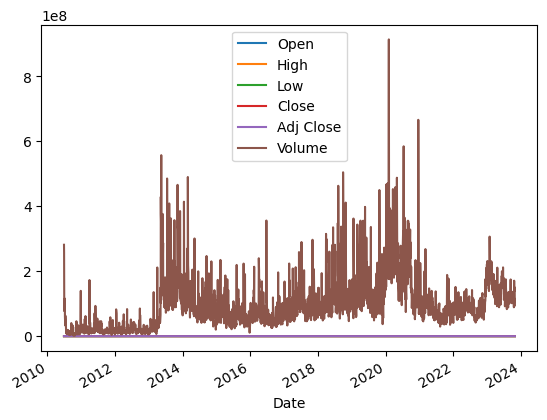

In [9]:
df.plot()

<Axes: xlabel='Date'>

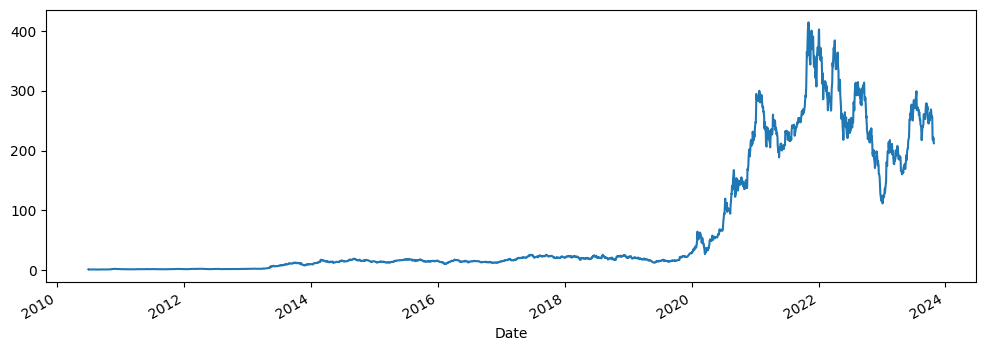

In [10]:
df['High'].plot(figsize=(12,4))

<Axes: xlabel='Date'>

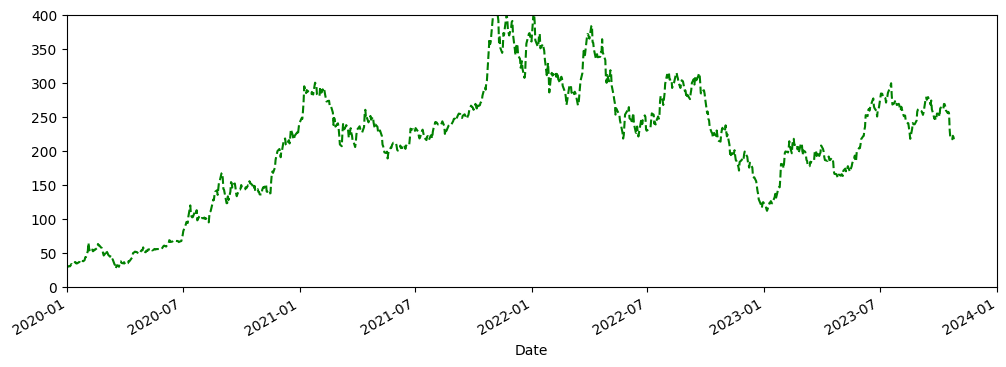

In [11]:
df['High'].plot(xlim=['2020-01-01','2024-01-01'],ylim=[0,400], figsize=(12,4),ls='--', c='green')

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-10-23,210.000000,216.979996,202.509995,212.080002,212.080002,150683400
2023-10-24,216.500000,222.050003,214.110001,216.520004,216.520004,118231100
2023-10-25,215.880005,220.100006,212.199997,212.419998,212.419998,107065100


In [13]:
df.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2023-10-16', '2023-10-17', '2023-10-18', '2023-10-19',
               '2023-10-20', '2023-10-23', '2023-10-24', '2023-10-25',
               '2023-10-26', '2023-10-27'],
              dtype='datetime64[ns]', name='Date', length=3357, freq=None)

In [14]:
df.head(4)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000


In [15]:
df.iloc[:4,:].index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02'], dtype='datetime64[ns]', name='Date', freq=None)

In [16]:
index = df.loc['2020-01-01':'2020-09-01'].index
share_open = df.loc['2020-01-01':'2020-09-01']['Open']

In [17]:
type(share_open)

pandas.core.series.Series

<Axes: xlabel='Date'>

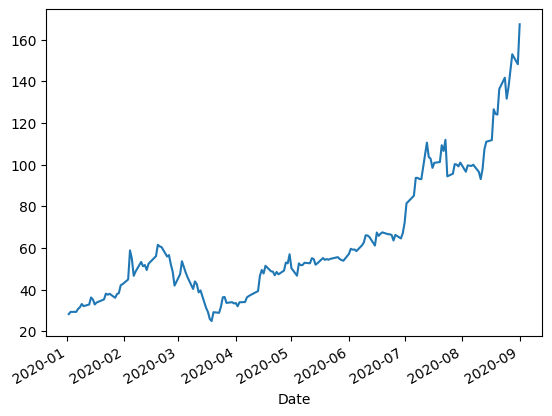

In [18]:
share_open.plot(kind='line')

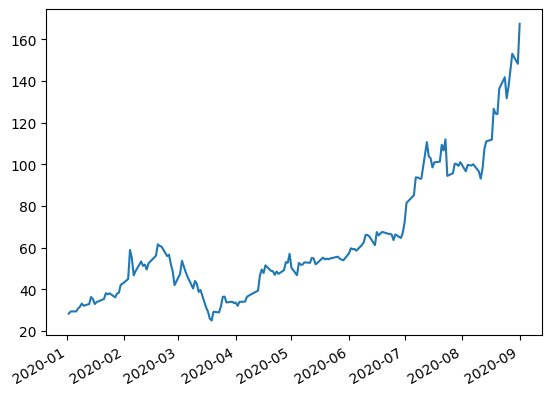

In [19]:
figure, axis = plt.subplots()
# plt.tight_layout()
figure.autofmt_xdate()
axis.plot(index, share_open)

In [20]:
##DateTime

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3357 entries, 2010-06-29 to 2023-10-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3357 non-null   float64
 1   High       3357 non-null   float64
 2   Low        3357 non-null   float64
 3   Close      3357 non-null   float64
 4   Adj Close  3357 non-null   float64
 5   Volume     3357 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 312.6 KB


In [22]:
df.reset_index()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3352,2023-10-23,210.000000,216.979996,202.509995,212.080002,212.080002,150683400
3353,2023-10-24,216.500000,222.050003,214.110001,216.520004,216.520004,118231100
3354,2023-10-25,215.880005,220.100006,212.199997,212.419998,212.419998,107065100
3355,2023-10-26,211.320007,214.800003,204.880005,205.759995,205.759995,115112600


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3357 entries, 2010-06-29 to 2023-10-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3357 non-null   float64
 1   High       3357 non-null   float64
 2   Low        3357 non-null   float64
 3   Close      3357 non-null   float64
 4   Adj Close  3357 non-null   float64
 5   Volume     3357 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 312.6 KB


In [25]:
# pd.to_datetime(df['Date'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3357 entries, 2010-06-29 to 2023-10-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3357 non-null   float64
 1   High       3357 non-null   float64
 2   Low        3357 non-null   float64
 3   Close      3357 non-null   float64
 4   Adj Close  3357 non-null   float64
 5   Volume     3357 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 312.6 KB


In [29]:
# df.set_index(df['Date'], drop=True, inplace=True)

In [30]:
# df.drop(columns=['Date'], inplace=True)

In [31]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-10-23,210.000000,216.979996,202.509995,212.080002,212.080002,150683400
2023-10-24,216.500000,222.050003,214.110001,216.520004,216.520004,118231100
2023-10-25,215.880005,220.100006,212.199997,212.419998,212.419998,107065100


In [32]:
df.reset_index(inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3357 entries, 0 to 3356
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3357 non-null   datetime64[ns]
 1   Open       3357 non-null   float64       
 2   High       3357 non-null   float64       
 3   Low        3357 non-null   float64       
 4   Close      3357 non-null   float64       
 5   Adj Close  3357 non-null   float64       
 6   Volume     3357 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 183.7 KB


In [34]:
##DateTime

In [35]:
date = datetime.now()

In [36]:
string = date.strftime("%Y-%m-%d %H:%M:%S")

In [37]:
datetime.strptime(string,"%Y-%m-%d %H:%M:%S" )

datetime.datetime(2023, 10, 29, 19, 30)

In [38]:
date.hour

19

In [39]:
date.minute

30

In [40]:
date.second

0

In [41]:
date.day

29

In [42]:
date.month

10

In [43]:
date.year

2023

In [44]:
## Time Resampling

In [45]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [46]:
df.set_index('Date', drop=True, inplace=True)

In [47]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [75]:
## year end frequency
minimum = df.resample(rule='A').min()

In [54]:
maximum = df.resample(rule='A').max()

In [55]:
type(df.resample(rule='A'))

pandas.core.resample.DatetimeIndexResampler

<Axes: xlabel='Date'>

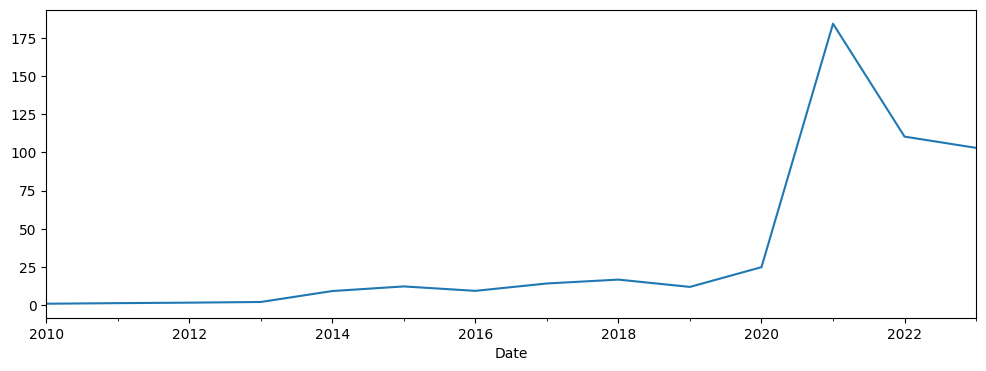

In [61]:
minimum['Open'].plot(figsize=(12,4))

<Axes: xlabel='Date'>

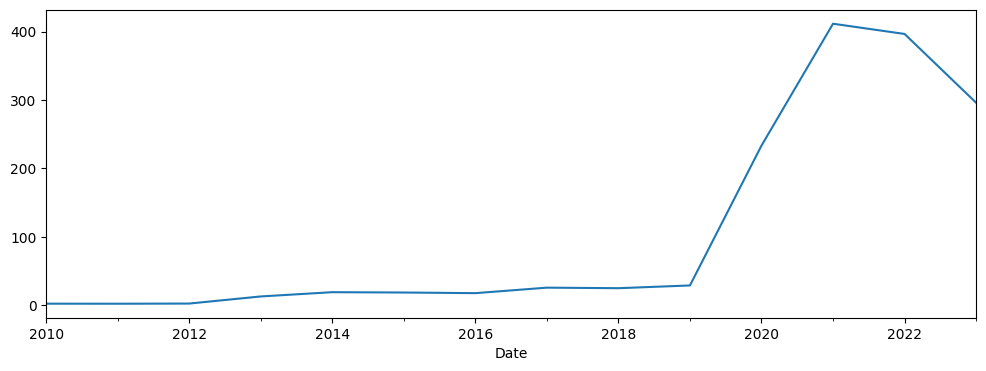

In [62]:
maximum['Open'].plot(figsize=(12,4))

<Axes: xlabel='Date', ylabel='Volume'>

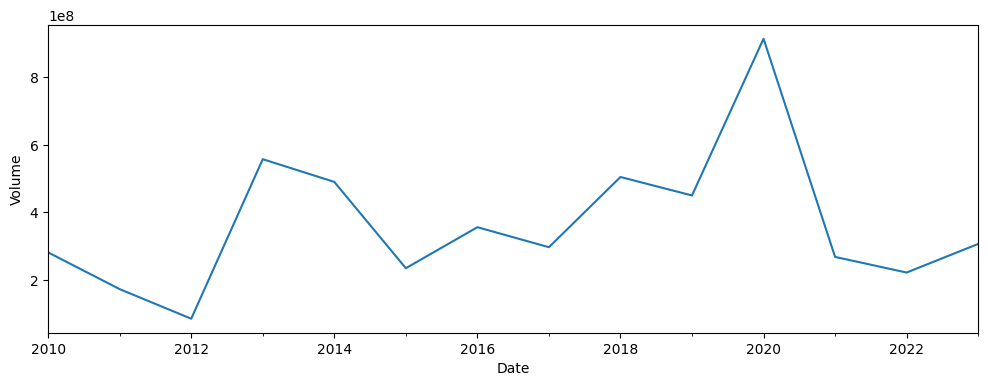

In [74]:
maximum['Volume'].plot(figsize=(12,4), ylabel='Volume')

<Axes: xlabel='Date', ylabel='Volume'>

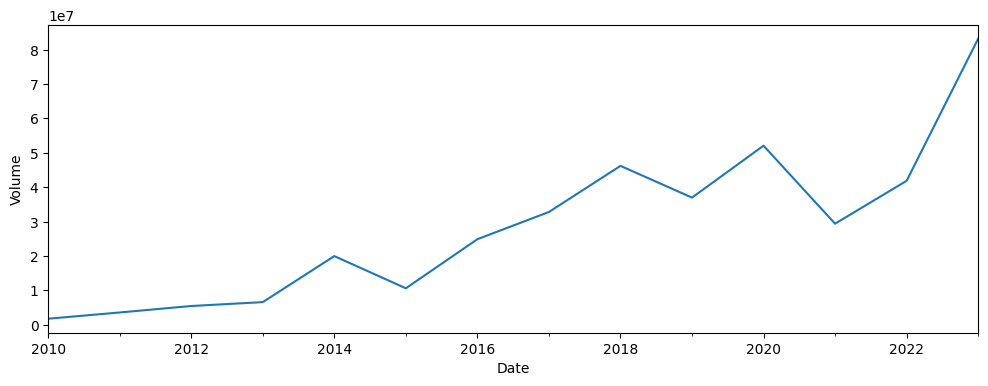

In [67]:
minimum['Volume'].plot(figsize=(12,4), ylabel='Volume')

In [81]:
## Quarterly start frequency

In [86]:
df.resample(rule='qs').max().head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-04-01,1.719333,2.028000,1.553333,1.592667,1.592667,281494500
2010-07-01,1.666667,1.728000,1.408667,1.465333,1.465333,123282000
2010-10-01,2.391333,2.428000,2.316667,2.364667,2.364667,139528500
2011-01-01,1.906000,1.914000,1.870000,1.896667,1.896667,172767000
2011-04-01,2.006667,2.100000,1.970000,2.009333,2.009333,93138000
2011-07-01,1.992667,2.029333,1.934000,1.982000,1.982000,45967500
2011-10-01,2.308667,2.333333,2.268667,2.329333,2.329333,58024500
2012-01-01,2.546000,2.663333,2.474000,2.529333,2.529333,82506000
2012-04-01,2.488667,2.564667,2.444667,2.534000,2.534000,83344500


In [87]:
## Business End Frequency

In [90]:
df.resample(rule='ba').max().head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,2.391333,2.428000,2.316667,2.364667,2.364667,281494500
2011-12-30,2.308667,2.333333,2.268667,2.329333,2.329333,172767000
2012-12-31,2.546000,2.663333,2.474000,2.534000,2.534000,85206000
2013-12-31,12.930667,12.966667,12.558000,12.891333,12.891333,557458500
2014-12-31,19.177999,19.427999,18.693333,19.069332,19.069332,490225500
2015-12-31,18.680000,19.110001,18.420000,18.817333,18.817333,234744000
2016-12-30,17.763332,17.955999,16.967333,17.694668,17.694668,356136000
2017-12-29,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500


<Axes: xlabel='Date'>

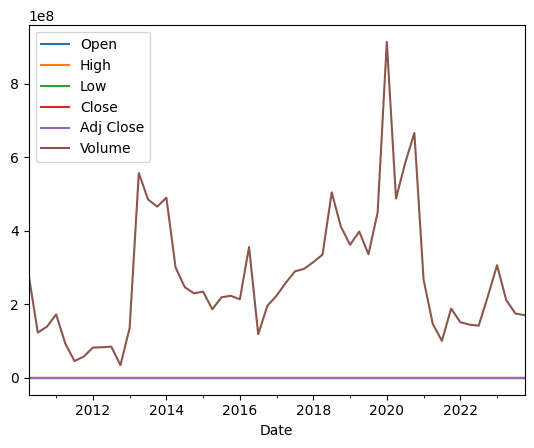

In [96]:
df.resample(rule='bqs').max().plot()

In [97]:
type(df)

pandas.core.frame.DataFrame

In [98]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-10-23,210.000000,216.979996,202.509995,212.080002,212.080002,150683400
2023-10-24,216.500000,222.050003,214.110001,216.520004,216.520004,118231100
2023-10-25,215.880005,220.100006,212.199997,212.419998,212.419998,107065100


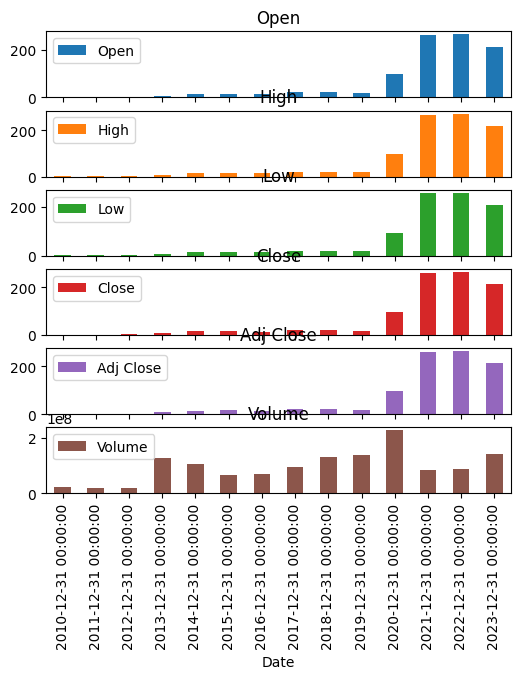

In [117]:
df.resample(rule='A').mean().plot(kind='bar', subplots=True, figsize=(6,6))
figure.autofmt_xdate()

In [124]:
df['High'].rolling(3).min()

Date
2010-06-29           NaN
2010-06-30           NaN
2010-07-01      1.666667
2010-07-02      1.540000
2010-07-06      1.333333
                 ...    
2023-10-23    216.979996
2023-10-24    216.979996
2023-10-25    216.979996
2023-10-26    214.800003
2023-10-27    212.410004
Name: High, Length: 3357, dtype: float64

In [120]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [231]:
df['Open:30 days rolling'] = df['Open'].rolling(30).mean()

In [232]:
df.head(4)

,Open,High,Low,Close,Adj Close,Volume,Open:30 days rolling
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,NaN
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,NaN
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,NaN


<Axes: xlabel='Date'>

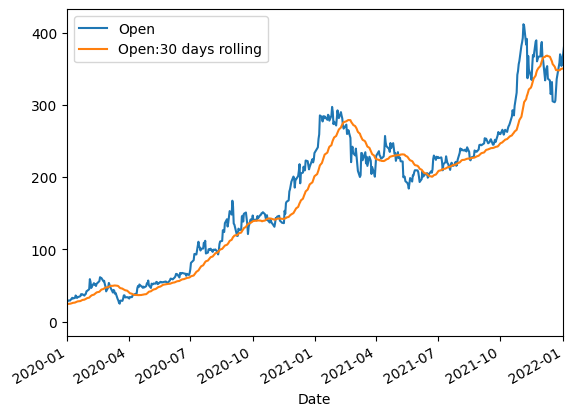

In [233]:
df[['Open','Open:30 days rolling']].plot(xlim=["2020-01-01","2022-01-01"])

In [234]:
## Day 2

In [235]:
## Simple moving average 

<Axes: xlabel='Date'>

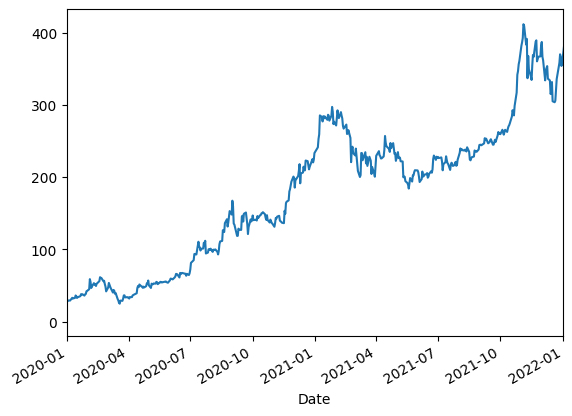

In [236]:
df['Open'].plot(xlim=['2020-01-01','2022-01-01'])

In [253]:
df['Open:20 days rolling'] = df['Open'].rolling(window=20).mean()
df['Open:50 days rolling'] = df['Open'].rolling(window=50).mean()
df['Open:70 days rolling'] = df['Open'].rolling(window=70).mean()

<Axes: xlabel='Date'>

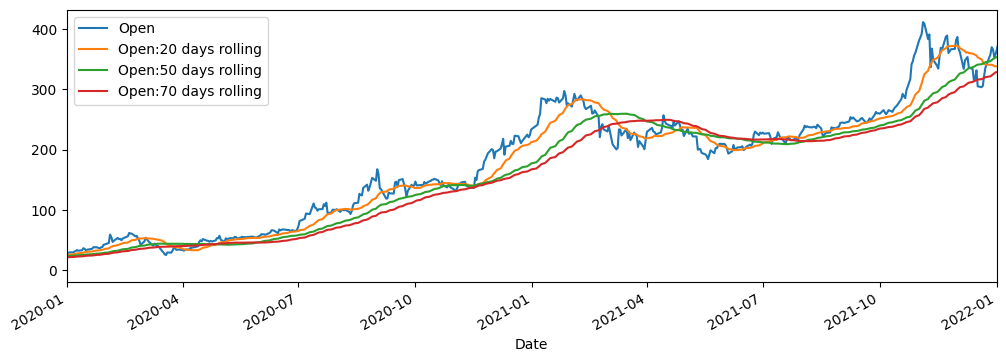

In [260]:
df[['Open','Open:20 days rolling', 'Open:50 days rolling', 'Open:70 days rolling']].plot(xlim=["2020-01-01","2022-01-01"], figsize=(12,4))

In [256]:
df.drop(columns = ['Open:30 days rolling'], inplace=True)

In [257]:
df

,Open,High,Low,Close,Adj Close,Volume,Open:20 days rolling,Open:50 days rolling,Open:70 days rolling
Date,,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN,NaN,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,NaN,NaN,NaN
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,NaN,NaN,NaN
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,NaN,NaN,NaN
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-10-23,210.000000,216.979996,202.509995,212.080002,212.080002,150683400,246.984500,248.072201,252.612858
2023-10-24,216.500000,222.050003,214.110001,216.520004,216.520004,118231100,245.660500,247.688201,251.611000
2023-10-25,215.880005,220.100006,212.199997,212.419998,212.419998,107065100,244.241501,247.231201,250.550001


In [261]:
## ARIMA MODEL

In [318]:
df = pd.read_csv('C:/Users/91962/Downloads/airline_passengers.csv')

In [319]:
df

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [320]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [321]:
df.loc[:1, :]

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0


In [322]:
import statsmodels.api as sms

In [323]:
df.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [324]:
df.duplicated().sum()

0

In [325]:
df.dropna(axis=0, inplace =True)

In [326]:
df.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [327]:
df.shape

(144, 2)

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [329]:
df['Month'] = pd.to_datetime(df['Month'])

In [330]:
df

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0
...,...,...
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0


In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [334]:
df.set_index('Month', inplace=True, drop=True)

In [335]:
df

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


<Axes: xlabel='Month'>

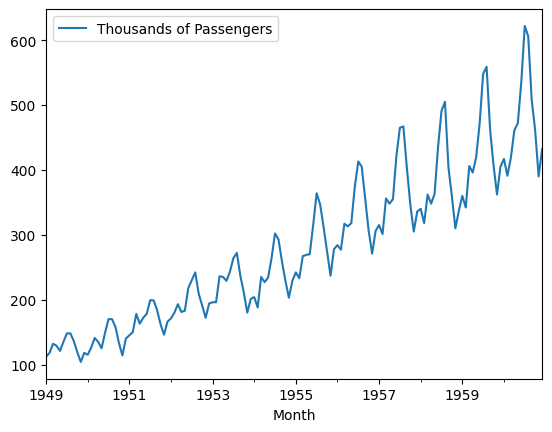

In [336]:
df.plot()

In [338]:
from statsmodels.tsa.stattools import adfuller

In [353]:
def adf_test(series):
    result = adfuller(series)
    print(result)
    print("\n")
    print('ADF statistics : {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against null hypothesis, reject the null hypothesis.Time series has no unit root and is stationary. ")
    else:
        print("weak evidence against the null hypothesis, Time series has a unit root, and it is not stationary.")

In [354]:
adf_test(df['Thousands of Passengers'])

(0.8153688792060457, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


ADF statistics : 0.8153688792060457
p-value: 0.991880243437641
weak evidence against the null hypothesis, Time series has a unit root, and it is not stationary.


In [355]:
## USE DIFFERENCING 

In [356]:
df['Passenger First Difference'] = df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(1)

In [357]:
df

,Thousands of Passengers,Passenger First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0
...,...,...
1960-08-01,606.0,-16.0
1960-09-01,508.0,-98.0
1960-10-01,461.0,-47.0


In [361]:
adf_test(df['Passenger First Difference'].dropna())

(-2.8292668241699963, 0.05421329028382592, 12, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 988.5069317854084)


ADF statistics : -2.8292668241699963
p-value: 0.05421329028382592
weak evidence against the null hypothesis, Time series has a unit root, and it is not stationary.


In [362]:
df['Passenger Second Difference'] =   df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(2)

In [363]:
adf_test(df['Passenger Second Difference'].dropna())

(-2.9616951355554195, 0.038629757676988855, 11, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 985.7309222414162)


ADF statistics : -2.9616951355554195
p-value: 0.038629757676988855
strong evidence against null hypothesis, reject the null hypothesis.Time series has no unit root and is stationary. 


In [365]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

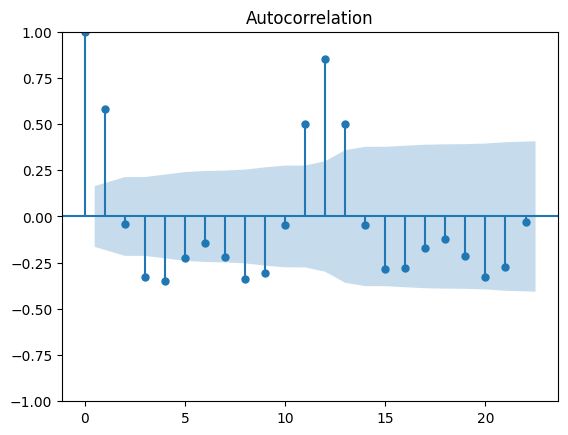

In [366]:
acf = plot_acf(df['Passenger Second Difference'].dropna())